## Doing this analyzes I have an aim to answer to the following questions:
###   1.  In which size of companies people more happy with their job
###   2.  Whether there are differences between the expectations of male and female
###   3.  How can we understand whether a person wants to be in the future based on some criteria (what kinds of data to collect for this question)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import survey_functions as fnc


%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head(3)

C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


What we need to do first of all, is to understand with what kind of data we are working

In [2]:
print("Dataset Shape: ", df.shape)
df.describe()

Dataset Shape:  (98855, 129)


,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,...,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,...,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,...,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,...,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,...,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,...,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


As wee see we are working with 98855 rows and 129 colums of data and from the table, count row, we can see that there are a lot of columns with missing data

## Question 1:
### In which size of companies people more happy with their job

First of all lets see how many types of responses do there exist in "Jobsatisfaction column".

In [3]:
df['JobSatisfaction'].value_counts()

Moderately satisfied                  26005
Extremely satisfied                   12436
Slightly satisfied                    10012
Slightly dissatisfied                  7057
Moderately dissatisfied                6318
Neither satisfied nor dissatisfied     4966
Extremely dissatisfied                 2482
Name: JobSatisfaction, dtype: int64

My another step will be to create a new data frame with "CompanySize" and "Jobsatisfaction" to work only on it for making analyzeis
Becouse in Jobsatisfaction column I have missing cells will drop all those rows with missing cells as Jobsatisfaction is the  column on which I'm doing prediction. If I have missing data in that colum, it will mess my prediction even if I put some other data into that missing cell, like mode of the column. 
Connected with Companysize, will fill missing data with the mose of the column

In [4]:
jobSatisfy=df[['JobSatisfaction', 'CompanySize']]

jobSatisfy=jobSatisfy.dropna(subset=['JobSatisfaction'], axis=0)

jobSatisfy['CompanySize']=jobSatisfy['CompanySize'].fillna(jobSatisfy['CompanySize'].mode()[0])

print(jobSatisfy['JobSatisfaction'].value_counts(), '\n')
print(jobSatisfy['CompanySize'].value_counts())

Moderately satisfied                  26005
Extremely satisfied                   12436
Slightly satisfied                    10012
Slightly dissatisfied                  7057
Moderately dissatisfied                6318
Neither satisfied nor dissatisfied     4966
Extremely dissatisfied                 2482
Name: JobSatisfaction, dtype: int64 

20 to 99 employees          23367
100 to 499 employees        11890
10,000 or more employees     8274
10 to 19 employees           6664
1,000 to 4,999 employees     6452
Fewer than 10 employees      6223
500 to 999 employees         3884
5,000 to 9,999 employees     2522
Name: CompanySize, dtype: int64


To get some understanding of my dataset and also to see whether there are any missing value

In [5]:
jobSatisfy.describe()

,JobSatisfaction,CompanySize
count,69276,69276
unique,7,8
top,Moderately satisfied,20 to 99 employees
freq,26005,23367


To see all my predictions graphically will use function cpecially created for it

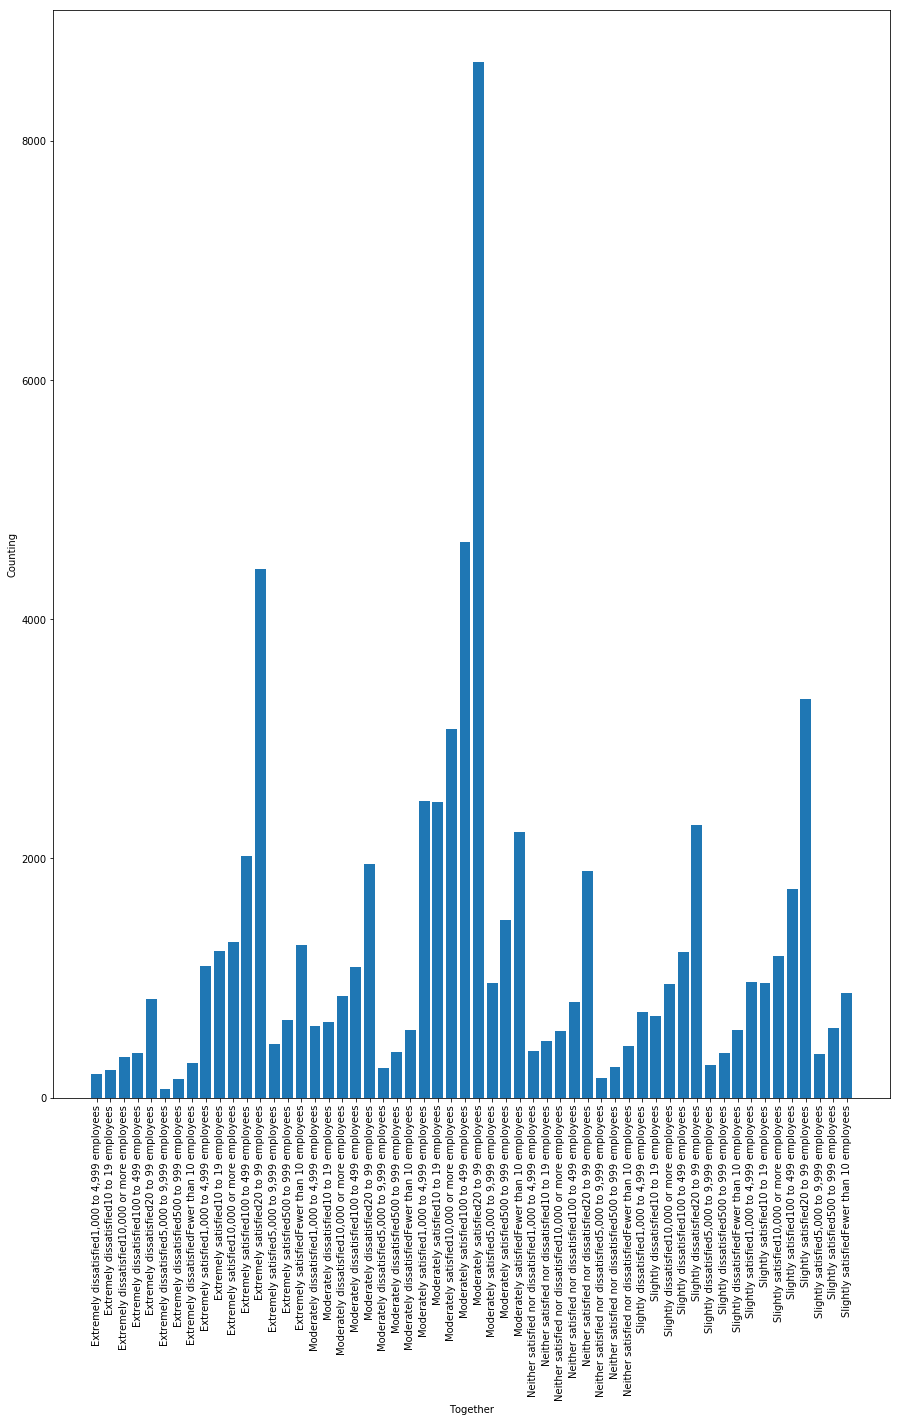

In [6]:
fnc.creating_graph(jobSatisfy, "JobSatisfaction", "CompanySize")

From the graph it can be clearly seen that majority of people are Moderately satisfyed from their job and they are working for the companies with 20-99 employees

## Question 2:
### Whether there are differences between the expectations of male and female

Will separate several colums which will use to predict genders expectation

In [7]:
filtered_df=df[['HopeFiveYears', 'Gender']]

I need to see whether there are any data in my columns that need to be corrected, deleted etc.

In [8]:
for col in filtered_df.columns:
    print(col, '\n', filtered_df[col].value_counts(), '\n')

HopeFiveYears 
 Working in a different or more specialized technical role than the one I'm in now    25643
Working as a founder or co-founder of my own company                                 19444
Doing the same work                                                                  14724
Working as an engineering manager or other functional manager                         7483
Working as a product manager or project manager                                       5004
Working in a career completely unrelated to software development                      2151
Retirement                                                                            1269
Name: HopeFiveYears, dtype: int64 

Gender 
 Male                                                                         59458
Female                                                                        4025
Non-binary, genderqueer, or gender non-conforming                              284
Female;Transgender                                   

As I see there is a big mess in "Gender". I'm interested in having two types of gender "Male" and "Female". Thats why I will do following: I will loop through all cells in "Gender" and if the fist appearing word is Male, I will convert it to Male, if Female, will convert it to Female. I will do like this, becouse I think tat if persons real gender is e.g male firsst of all he will mention male kater female
Also as I see there are cell which does not contain any of these words "Male" or "Female"

In [9]:
i=0
filtered_df['Gender'].fillna("", inplace=True)
for row in filtered_df['Gender']:
    if len(row)>6:
        rows=row.split(';')
        for textInRow in rows:
            if textInRow=="Male":
                filtered_df['Gender'][i]="Male"
                break
            elif textInRow=="Female":
                filtered_df['Gender'][i]="Female"
                break
            else:
                continue      
    i+=1

C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3291: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


To see what whether there are any difference in Males and Females expectation in future I will createnew dataframe and make chart

In [10]:
expectations=filtered_df[['Gender', 'HopeFiveYears']]
expectations.describe()

,Gender,HopeFiveYears
count,98855,75718
unique,6,7
top,Male,Working in a different or more specialized tec...
freq,59620,25643


As I see there are a lot of missing cells in "HopeFiveYears" column. Will fill them with the mode of the column

In [11]:
expectations['HopeFiveYears'] = expectations['HopeFiveYears'].fillna(expectations['HopeFiveYears'].mode()[0])
expectations.describe()

,Gender,HopeFiveYears
count,98855,98855
unique,6,7
top,Male,Working in a different or more specialized tec...
freq,59620,48780


As I see everythin looks good. So lets prepare graphs and see whethere there are any differences beteen males and females expactations

In [12]:
#separating males and females for graphical view
maleExpectation=expectations[expectations['Gender'] == "Male"]
femaleExpectation=expectations[expectations['Gender'] == "Female"]

Graph for Males

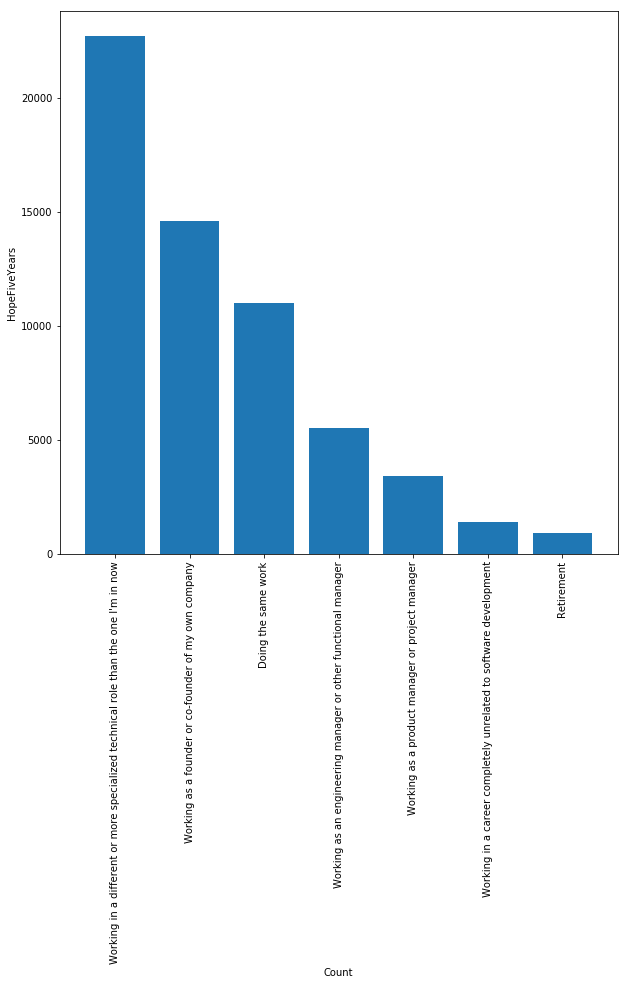

In [13]:
fnc.plot_expectation(maleExpectation['HopeFiveYears'])

Graph for Females

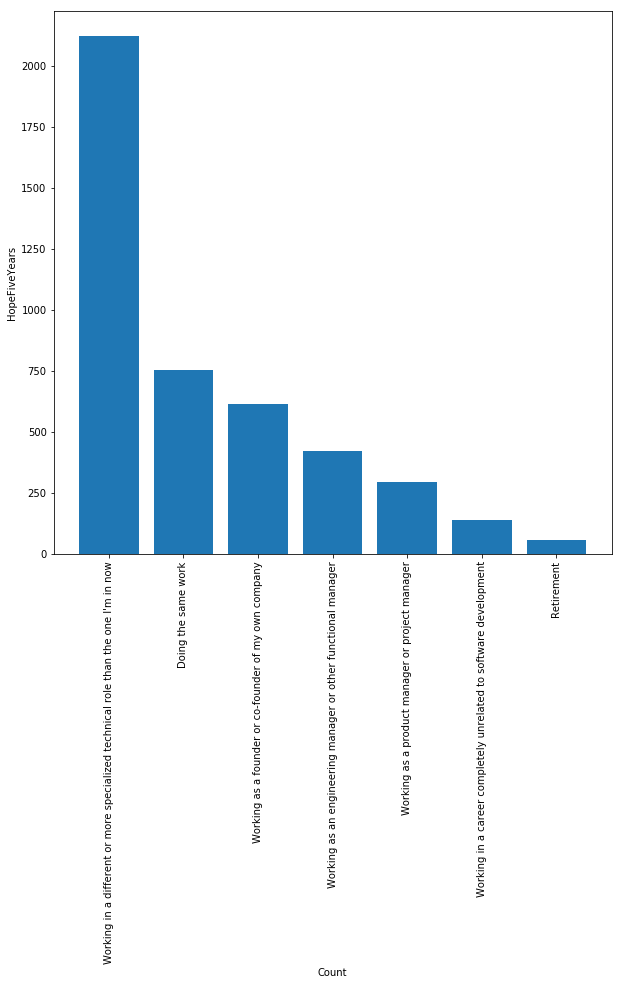

In [14]:
fnc.plot_expectation(femaleExpectation['HopeFiveYears'])

From the graph it can be seen that proportionally woman are more con to stay working for others by doing more specialized work. And mans, compared to woman, are more con to have their own buiness.

To see whether there are any missing values in my new dataframe as missing data affects on analyzes

In [15]:
filtered_df.isnull().sum()

HopeFiveYears    23137
Gender               0
dtype: int64

As I see there are a lot of missing values in my dataframe. To understand how to treat them, I need to know what kinde of datatypes are in each column.

In [16]:
#Checking datatypes
filtered_df.dtypes

HopeFiveYears    object
Gender           object
dtype: object

Will create new dataframe for working on it. Also will create 1 additional column which will count how many times HopfiveYears and FormalEducation repeats together

In [17]:
check_future=df[['HopeFiveYears', 'FormalEducation']]
#create row to count repeated combinations
check_future=check_future.groupby(['HopeFiveYears', 'FormalEducation']).size().reset_index().rename(columns={0:'count'})
check_future.head()

,HopeFiveYears,FormalEducation,count
0,Doing the same work,Associate degree,543
1,Doing the same work,"Bachelor’s degree (BA, BS, B.Eng., etc.)",6394
2,Doing the same work,I never completed any formal education,117
3,Doing the same work,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",3395
4,Doing the same work,"Other doctoral degree (Ph.D, Ed.D., etc.)",490


Lets see graphically how many people have the same types of expectation from the future and which one is the biggist

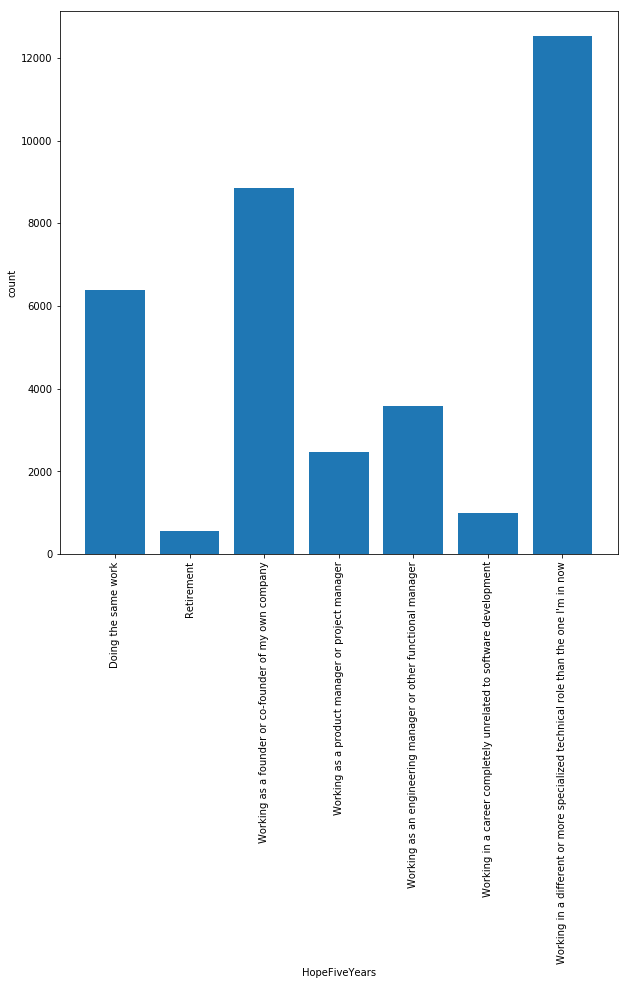

In [18]:
fnc.plot_two_cols(check_future, 'HopeFiveYears', 'count', 10)

Lets see number of specific type/degree of education in the dataset

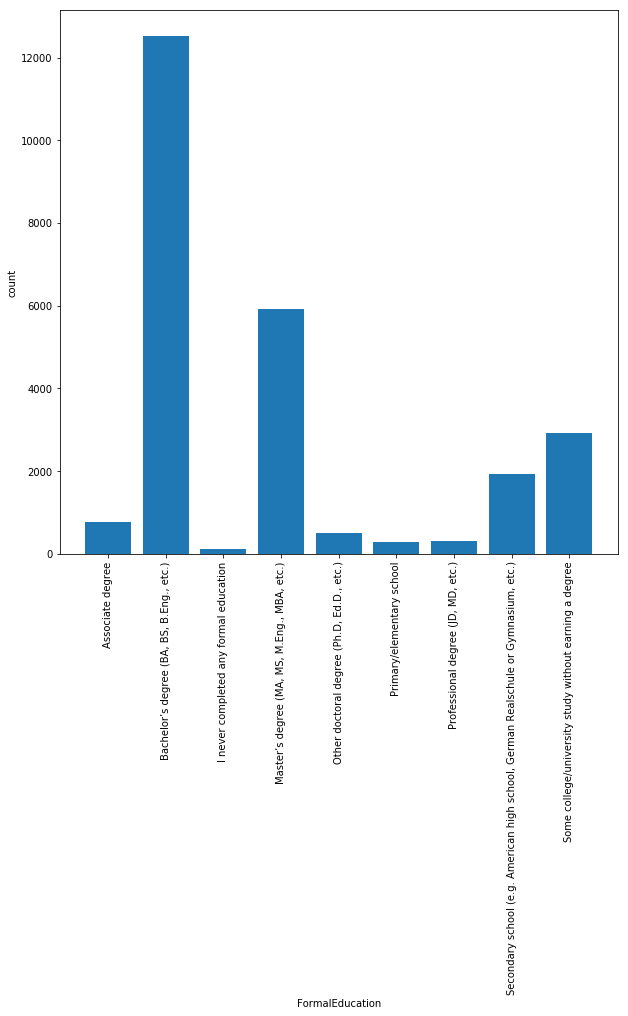

In [19]:
fnc.plot_two_cols(check_future, 'FormalEducation', 'count', 10)

So from above 2 graphs I can see that those who have Bachelor degree will prefer to work in different mor specialized technical role. Its mean that they are still not satisfied with their career achievements.

Of Course t see our analyzes in a better view I will create another graph, showing HOpefiveyears and FormalEducation together

In [20]:
#connecting two cols together
connect_col = check_future['HopeFiveYears']+ check_future['FormalEducation']
#add new column counting reated couples
f = pd.DataFrame({'Together':connect_col,'Counting':check_future['count']})

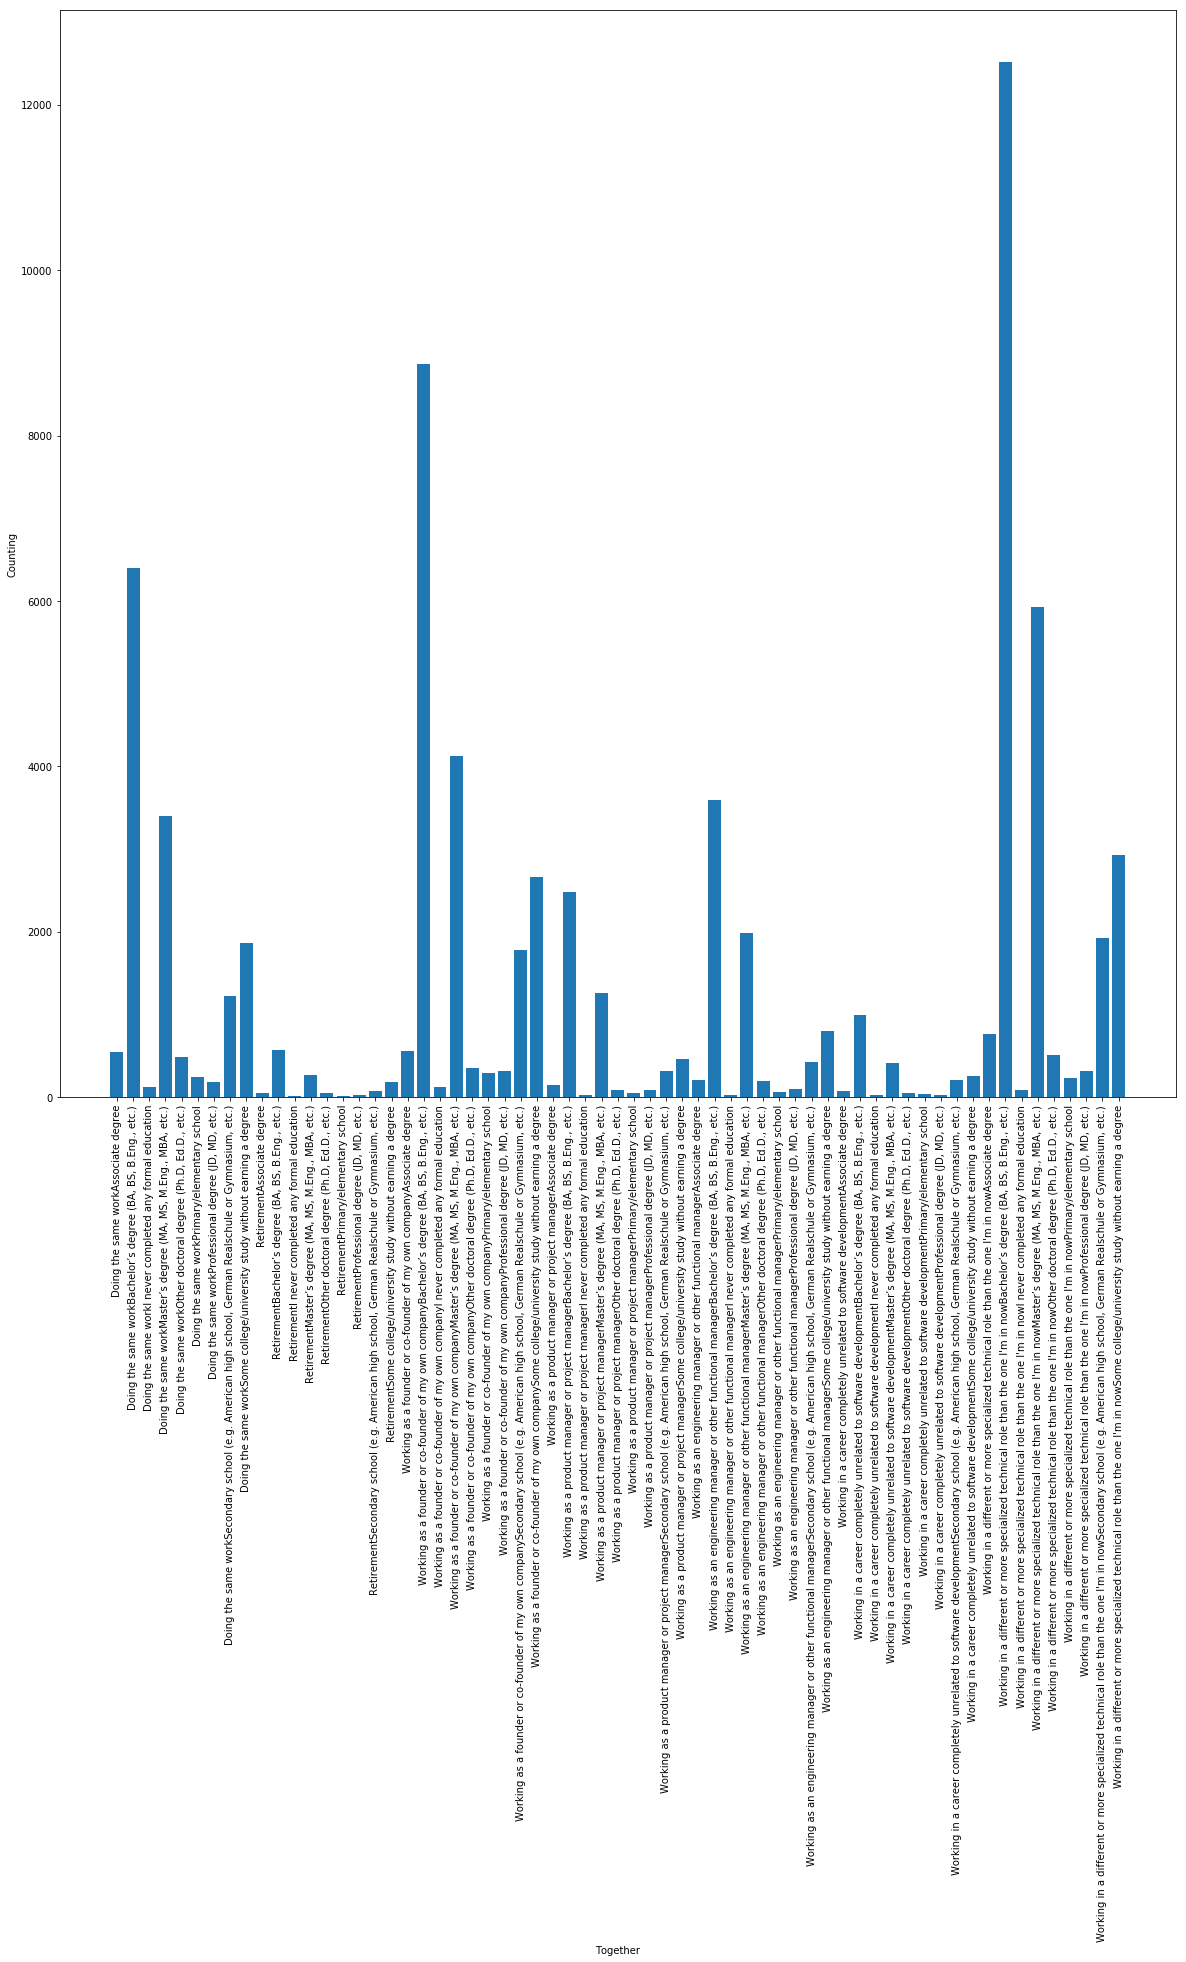

In [21]:
fnc.plot_two_cols(f, 'Together', 'Counting', 20)

From above graph it can also be seen that people with Bachelor Degree are more con to open their own business

## Question 3: 
### Now I want to see where a person wants to be in the future based on some criteria and what data are necessary to understand it (some of basic questions during an interview)

In [22]:
df_3=pd.read_csv('./survey_results_public.csv')
df_3.shape

(98855, 129)

Want to see whethr there are a lot of missing values in 1 column, if yes will get rid of that column becouse it will affect negatively on my analyzes

In [23]:
for col in df_3.columns:
    noVals=df_3[col].isnull().sum()/df_3.shape[0]
    if noVals>.94:
        print(col, noVals)

As I see all my there are no huge amount of missing values. Now will check also for rows.
Thet's why will add additional column where number of missing data will be saved

In [24]:
#new col with number of missing data in a row. 
df_3['missings_in_rows'] =df_3.apply(lambda x: x.count(), axis=1)

#for recording index of rows with high number of missing cells
i=0

#counting number of rows with high number of missing data
c_rows=0
index_missing_row=[]
for rw in df_3['missings_in_rows']:
    missing_percent=rw/df_3.shape[1]
    if missing_percent>.96:
        c_rows+=1
        index_missing_row.append(i)
    i+=1
print("Number of rows with high number of missing cells ", c_rows)

Number of rows with high number of missing cells  5331


As I see there are something which I will prefer to drop. so will loop throgh missing rows and drop them

In [25]:
df_3.drop(index_missing_row, axis=0, inplace=True)
df_3.shape

(93524, 130)

As I get rid of unnecessary part, I dont need missings_in_rows column any more, so will drop it

In [26]:
df_3=df_3.drop(['missings_in_rows'], axis=1)

Becouse interested in getting 'HopeFiveYears' so will drop those rows where there is no data in 'HopeFiveYears' cell

In [27]:
df_3.dropna(subset=['HopeFiveYears'], axis=0, inplace=True)
df_3.shape

(70387, 129)

So there were 93524-70387=23,137 rows where there were no data in "HopeFiveYears" cell

Now will iterate through dtaset and fill missing data, becouse to do analyzes/predictions I eed all my cells have data

For those colums which types are integers or floats, that missing cells will be filled with the mean of the column. Assume that there is something that is missing it should be more or less be the same as mean of the whole column

In [28]:
for col in df_3:
    #get dtype for column
    dt = df_3[col].dtype 
    #check if it is a number
    if dt !=object:
        df[col].fillna(df[col].mean())

For those colums which contains text (which are not numeric), that missing cells will be filled with the mode of the column. Fore these kind of colums mean can not be calculated. Assume that if there is something that is missing it should be more or less be the same as the text which is repaeting more in the column

In [29]:
fillmode=lambda col:col.fillna(col.mode()[0])
df_3=df_3.apply(fillmode, axis=0)

To see what our dataset looks like after all above manipulations

In [30]:
df_3.describe()

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,...,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,70387.000000,70387.000000,70387.000000,70387.000000,70387.000000,70387.000000,70387.000000,70387.000000,70387.000000,70387.000000,...,70387.000000,70387.000000,7.038700e+04,70387.000000,70387.000000,70387.000000,70387.000000,70387.000000,70387.000000,70387.000000
mean,50748.591359,6.839743,7.053831,6.254067,3.554506,3.469305,4.171523,6.381107,3.691633,8.023939,...,5.878728,5.346371,5.577460e+04,2.202751,3.857957,2.932928,3.850441,4.874806,5.705244,5.476935
std,29330.540482,2.713297,2.475387,2.539354,2.585848,2.549302,2.347349,3.117892,2.588067,2.371862,...,1.711989,1.370881,1.598828e+05,1.758118,1.525673,1.524585,1.544105,1.774403,1.762904,1.858326
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25358.500000,5.000000,5.000000,4.000000,1.000000,1.000000,3.000000,4.000000,1.000000,7.000000,...,5.000000,5.000000,0.000000e+00,1.000000,3.000000,2.000000,3.000000,4.000000,5.000000,4.000000
50%,50685.000000,8.000000,8.000000,7.000000,3.000000,3.000000,3.000000,7.000000,3.000000,9.000000,...,7.000000,6.000000,1.234800e+04,1.000000,4.000000,2.000000,4.000000,6.000000,7.000000,6.000000
75%,76149.000000,9.000000,9.000000,8.000000,5.000000,5.000000,6.000000,10.000000,5.000000,10.000000,...,7.000000,6.000000,6.315600e+04,3.000000,5.000000,4.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.000000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Now there is another problem. We have a lot of colums which contains text. In order to work with text we need to convert text to numbers. Thets why I will use factorize as it convert text into numbers without adding additional colums. Another way is to use dummy function, but in this case additional colums will be added which will make problem for computing (strong omputer is needed)

In [31]:
df_dummy=df_3
for c in df_dummy.columns:
    df_dummy[c] = pd.factorize(df_dummy[c])[0]

In [32]:
df_dummy.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,1,0,1,1,1,...,1,0,0,0,1,1,0,0,0,1
2,2,0,1,2,0,1,1,2,0,2,...,2,0,0,0,1,0,1,0,1,1
3,3,1,0,2,0,1,0,2,2,0,...,2,0,0,1,1,1,1,0,0,1
4,4,0,0,3,1,1,2,2,1,3,...,0,0,0,1,1,2,0,0,0,1


Lets see correlation of differetn colums. It will help to select proper dataset for projection

In [33]:
dfCorr=df_dummy.corr()
dfCorr.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
Respondent,1.000000,-0.031685,0.037656,0.049809,0.138932,0.586471,0.085038,0.001986,-0.334318,0.290401,...,-0.004119,0.009793,0.018007,-0.003826,0.011034,0.154609,0.049832,-0.002727,0.002584,0.021703
Hobby,-0.031685,1.000000,-0.198311,0.015957,-0.055205,-0.040772,-0.032403,0.011257,0.026971,-0.057993,...,-0.006915,0.017834,-0.010293,-0.012045,0.014176,-0.023357,-0.033729,-0.005865,0.026306,0.000202
OpenSource,0.037656,-0.198311,1.000000,-0.010255,0.044984,0.033210,0.043964,-0.006811,-0.024122,0.090288,...,0.000007,0.008050,0.022994,0.013876,0.005492,0.007382,-0.030094,0.010805,0.010273,0.026627
Country,0.049809,0.015957,-0.010255,1.000000,0.081792,0.043625,0.023623,-0.032190,-0.005929,0.055223,...,0.038099,-0.023832,-0.009222,-0.025870,0.079963,-0.033076,0.023131,-0.071413,0.067550,0.067195
Student,0.138932,-0.055205,0.044984,0.081792,1.000000,0.135646,0.035533,-0.057300,-0.056630,0.131218,...,0.017488,0.003213,0.008846,-0.045389,0.038627,0.072835,0.145397,-0.027643,0.055829,0.041990


As I see there are correlations with negative sign. Actully negative and postitive just mean that changes of one data are affecting positively or negatively on another colum. What is more important here to know how big is the impact. That's whywill convert all numbers of correlation into absolute values 

In [34]:
dfCorr_ABS=abs(dfCorr)
dfCorr_ABS.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
Respondent,1.000000,0.031685,0.037656,0.049809,0.138932,0.586471,0.085038,0.001986,0.334318,0.290401,...,0.004119,0.009793,0.018007,0.003826,0.011034,0.154609,0.049832,0.002727,0.002584,0.021703
Hobby,0.031685,1.000000,0.198311,0.015957,0.055205,0.040772,0.032403,0.011257,0.026971,0.057993,...,0.006915,0.017834,0.010293,0.012045,0.014176,0.023357,0.033729,0.005865,0.026306,0.000202
OpenSource,0.037656,0.198311,1.000000,0.010255,0.044984,0.033210,0.043964,0.006811,0.024122,0.090288,...,0.000007,0.008050,0.022994,0.013876,0.005492,0.007382,0.030094,0.010805,0.010273,0.026627
Country,0.049809,0.015957,0.010255,1.000000,0.081792,0.043625,0.023623,0.032190,0.005929,0.055223,...,0.038099,0.023832,0.009222,0.025870,0.079963,0.033076,0.023131,0.071413,0.067550,0.067195
Student,0.138932,0.055205,0.044984,0.081792,1.000000,0.135646,0.035533,0.057300,0.056630,0.131218,...,0.017488,0.003213,0.008846,0.045389,0.038627,0.072835,0.145397,0.027643,0.055829,0.041990


Based on the correlation numbers will take only those which have high impact

In [35]:
highCorr=[]
for each in dfCorr_ABS['HopeFiveYears']:
    if each>.03:
        highCorr.append(each)

In [36]:
highCorr

[0.03426376002307679,
 0.09877133892323445,
 0.03540945549530626,
 0.04503364608120061,
 1.0,
 0.04762781812411826,
 0.03943357217777962,
 0.044596385408416525,
 0.0387038844434822,
 0.06223493201807596,
 0.038106284684101696,
 0.03737182236024063,
 0.055657312523975815,
 0.047908378845911745,
 0.03207555768918045,
 0.034939006018753056,
 0.03244729243194112,
 0.03104443332153139]

Above numbers are what I need. But what is more importnt to see colums associated with that numbers. That's why will execute belowmentioned syntax

In [37]:
highCorrVArs=dfCorr_ABS[dfCorr_ABS['HopeFiveYears'].isin(highCorr)]
highCorrVArs.index

Index(['Respondent', 'Hobby', 'OpenSource', 'YearsCodingProf', 'HopeFiveYears',
       'JobSearchStatus', 'AssessBenefits6', 'JobEmailPriorities5',
       'HackathonReasons', 'LanguageDesireNextYear', 'DatabaseDesireNextYear',
       'PlatformWorkedWith', 'PlatformDesireNextYear',
       'FrameworkDesireNextYear', 'IDE', 'AIFuture', 'HypotheticalTools4',
       'WakeTime'],
      dtype='object')

It is also a good idea to see all connections visually. That why will create heatmap

In [38]:
selectedCols=df_3[highCorrVArs.index]

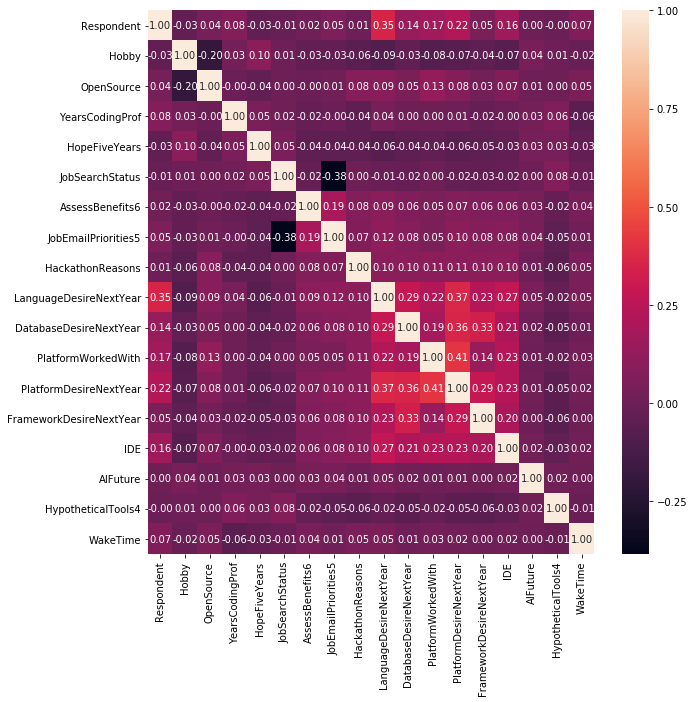

In [39]:
fnc.create_heatmap(selectedCols, 10)

Abovementioned colums will be used to do projections for future expectations of an employee as they were those which have high impact on HopeFiveYears column. Just will not take 'Respondent' column as it is just column with the number of Respondent and in reality has no importance

In [40]:
#colums for predictions
columsForX=['Hobby', 'OpenSource', 'YearsCodingProf',
       'JobSearchStatus', 'AssessBenefits6', 'JobEmailPriorities5',
       'HackathonReasons', 'LanguageDesireNextYear', 'DatabaseDesireNextYear',
       'PlatformWorkedWith', 'PlatformDesireNextYear',
       'FrameworkDesireNextYear', 'IDE', 'AIFuture', 'HypotheticalTools4',
       'WakeTime']
#colum to predict
columsForY=['HopeFiveYears']

Also it is a good idea to see what kind of questions were ask for certain column (which I'm interested in)

In [41]:
questAsk=pd.read_csv('./survey_results_schema.csv')
questList=questAsk[questAsk['Column'].isin(columsForX)]
questList

,Column,QuestionText
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
11,YearsCodingProf,For how many years have you coded professional...
15,JobSearchStatus,Which of the following best describes your cur...
32,AssessBenefits6,"Now, imagine you are assessing a job's benefit..."
47,JobEmailPriorities5,Imagine that same company decided to contact y...
61,HackathonReasons,You indicated previously that you had particip...
66,LanguageDesireNextYear,"Which of the following programming, scripting,..."
68,DatabaseDesireNextYear,Which of the following database environments h...
69,PlatformWorkedWith,Which of the following platforms have you done...


From my dummied dataframe will take those colums which will be analyzed and do predictions

In [42]:
X=df_dummy[columsForX]
y=df_dummy['HopeFiveYears']

In [43]:
#splittig data into train adn test
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.3, random_state=42)

#now will instantiate my model
lm_model=LinearRegression(normalize=True)

#now will fit model
lm_model.fit(X_train, y_train)

#now will predict on test data
y_test_preds=lm_model.predict(X_test)
#will calcualte score on test data
length_y_test=len(y_test)
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
print('Test score is: ', test_score)
print('Train score is: ',train_score)
print("Length of testing model: ", len(y_test_preds))

Test score is:  0.01960800548963748
Train score is:  0.022375674680260804
Length of testing model:  21117
